**Tensorflow Play**

Getting familiar with Tensorflow by developing a simple classifier.

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

**Getting the Data**

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

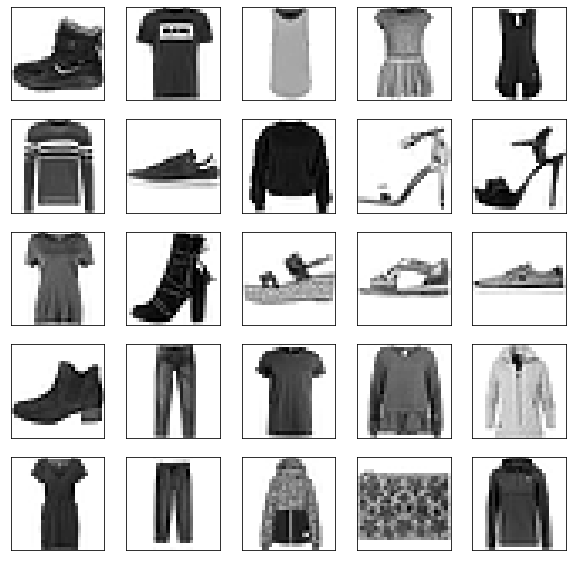

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
plt.show()

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

**Create a [`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) Model**

It is the simplest of Keras models for NN.

In [6]:
model = keras.models.Sequential()

Create a [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) layer to convert the array into a 1D array.

It computes `X.reshape(-1,28,28)`

In [7]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))

Create [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layers

**Dense Layer:**  is a fully connected layer, meaning that every neuron in a Dense layer will be fully connected to every neuron in the prior layer.

In [8]:
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

Final Layer has `10` neurons, one for each `class`

In [9]:
model.add(keras.layers.Dense(10, activation="softmax"))

**Model Summary**

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


No. Params in this case = (28*28) * 300 + 300 in the first hidden layer

**Compile the Model**

* `sparse_categorical_crossentropy` -> Using this since we have sparse labels
* `sgd` -> train the model using simple Stochastic Gradient Descent
* `accuracy` -> No real reason, would highly depend on the business problem

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

**Callbacks**

In [12]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("../models/classification_intro_to_tensorflow.h5",
                                                save_best_only=True)

In [13]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True,
                                                  monitor='accuracy')

**Tensorboard Setup**

The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations. We create an appropiate root log directory and configure the program so that it writes to a different subdirectory every time it runs.


In [14]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [15]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

**Model Training**

In [16]:
%%time
model_train = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid),
                        callbacks=[checkpoint_cb,early_stopping_cb,tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9604 - accuracy: 0.6871 - val_loss: 0.5272 - val_accuracy: 0.8158
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5047 - accuracy: 0.8249 - val_loss: 0.4427 - val_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4530 - accuracy: 0.8421 - val_loss: 0.4278 - val_accuracy: 0.8532
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4134 - accuracy: 0.8547 - val_loss: 0.4616 - val_accuracy: 0.8452
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3991 - accuracy: 0.8607 - val_loss: 0.3724 - val_accuracy: 0.8722
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3817 - accuracy: 0.8649 - val_loss: 0.3799 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3676 - accuracy: 0.8708 - val_loss: 0.3918 - val_accuracy:

In [17]:
model_train.model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3226 - accuracy: 0.8852


[0.3226049244403839, 0.885200023651123]

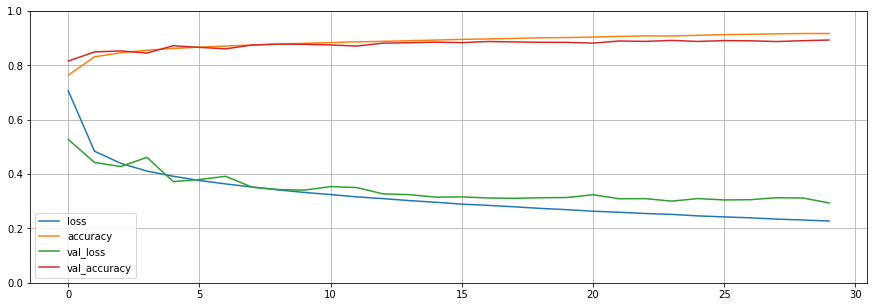

In [18]:
pd.DataFrame(model_train.history).plot(figsize = (15,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**Openning Tensorboard**

There are two ways of Tensorboard. Via the terminal or on a Jupyter Notebook.

* Terminal -> `tensorboard --logdir=./my_logs --port=6006`
* Jupyter -> See cell below

In [19]:
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:90% !important; }</style>"))

In [20]:
# !taskkill /F /PID 17788